<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#损失函数与优化算法" data-toc-modified-id="损失函数与优化算法-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>损失函数与优化算法</a></span><ul class="toc-item"><li><span><a href="#损失函数" data-toc-modified-id="损失函数-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>损失函数</a></span><ul class="toc-item"><li><span><a href="#类别采样损失函数" data-toc-modified-id="类别采样损失函数-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>类别采样损失函数</a></span></li></ul></li><li><span><a href="#目标函数优化策略" data-toc-modified-id="目标函数优化策略-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>目标函数优化策略</a></span><ul class="toc-item"><li><span><a href="#随机梯度下降SGD" data-toc-modified-id="随机梯度下降SGD-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>随机梯度下降SGD</a></span></li><li><span><a href="#RMSProp" data-toc-modified-id="RMSProp-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>RMSProp</a></span></li><li><span><a href="#Adam" data-toc-modified-id="Adam-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Adam</a></span></li></ul></li></ul></li></ul></div>

# 损失函数与优化算法
## 损失函数
目前的机器学习算法多是基于统计学习理论,其重点在于通过有限的训练数据归纳出总体平均意义下的最优规律,用有限的样本逼近全局最优的概率分布,损失函数的作用就是衡量逼近的程度.损失函数的设计体现了人们对求解问题的理解程度,针对大数据训练,tensorflow提供了类别采样(candidate sampling)损失函数,对减少内存消耗和计算量有非常大的帮助. 
### 类别采样损失函数
类别采样损失函数分为两类:一种是之心数值的概率转换函数softmax,另一种是基于概率密度函数的损失函数logistic,以下以单词向量化(word2seq)为例对基于类别采样的损失函数的优点进行了说明.  
假设一个分类问题,每个训练样本由$(x_i,T_i)$组成.其中$x_i$表示上下文特征,$T_i$是一个比整个样本类别集合T小得多的类别样本子集.此时我们希望学习一个稳定的预测函数$f(x,y)$,并由它来估计样本上下文$x$和预测目标$y$的关系.  
当训练使用所有数据样本类别更新模型时,我们在计算softmax或者logistic等操作时需要加载并计算每个训练样例$f(x,y)$对应每个类$y\in L$的预测概率,当类别|L|比较大时,这一操作的内存和计算开销都会非常大.类别采样技术是针对这一问题的常用技术方法.在构建训练任务时,对每个训练样例$(x_i,T_i)$,在一个类别子集$C_i$构成的数据包(batch)中对函数$f(x,y)$进行评估优化.通常类别子集$C_i$由目标类别集合$T_i$和从整体类别集合中随机选择的类别子集$S_i\subset L$构成,即$C_i=T_i\cup S_i$,负样本类别集合$S_i$的选择方式可以与上下文特征$x_i$或目标类别$T_i$相关.  
$Q(y|x)$表示类别集合$C_i$中具体采样类别的概率密度函数,其中x表示采样函数的上下文相关特征向量,y表示采样数据包的类别集合$C_i$中单个或多个类别.<br/> 
$K(x)$表示仅与上下文相关特征向量x相关的任何一个可能函数.<br/>
$G(x,y)表示样本特征x对应类标签向量y的概率置信度相关向量$
logistic损失函数如下$$loss=\sum_i{y_i\times (-ln(G(x_i|y_i))+(1-y_i)\times (-ln(1-G(x_i|y_i))}$$
softmax的损失函数如下$$loss=ln\frac{\sum_{y\in POS_i\cup NEG_i}{exp(G(x_i,y))}}{exp(G(x_i,y)[t_i]}$$
其中,$t_i$表示样本*i*的类别标签序号.置信度相关向量$G(x,y)$在目标类别$t_i$的分量值占比越大,进行softmax指数归一化时的比例值越小,则最终的损失函数值越小.对于softmax函数,相同数据集使用全类别集合和子类别采样集合训练时,向量$G(x,y)$的长度是不同的.
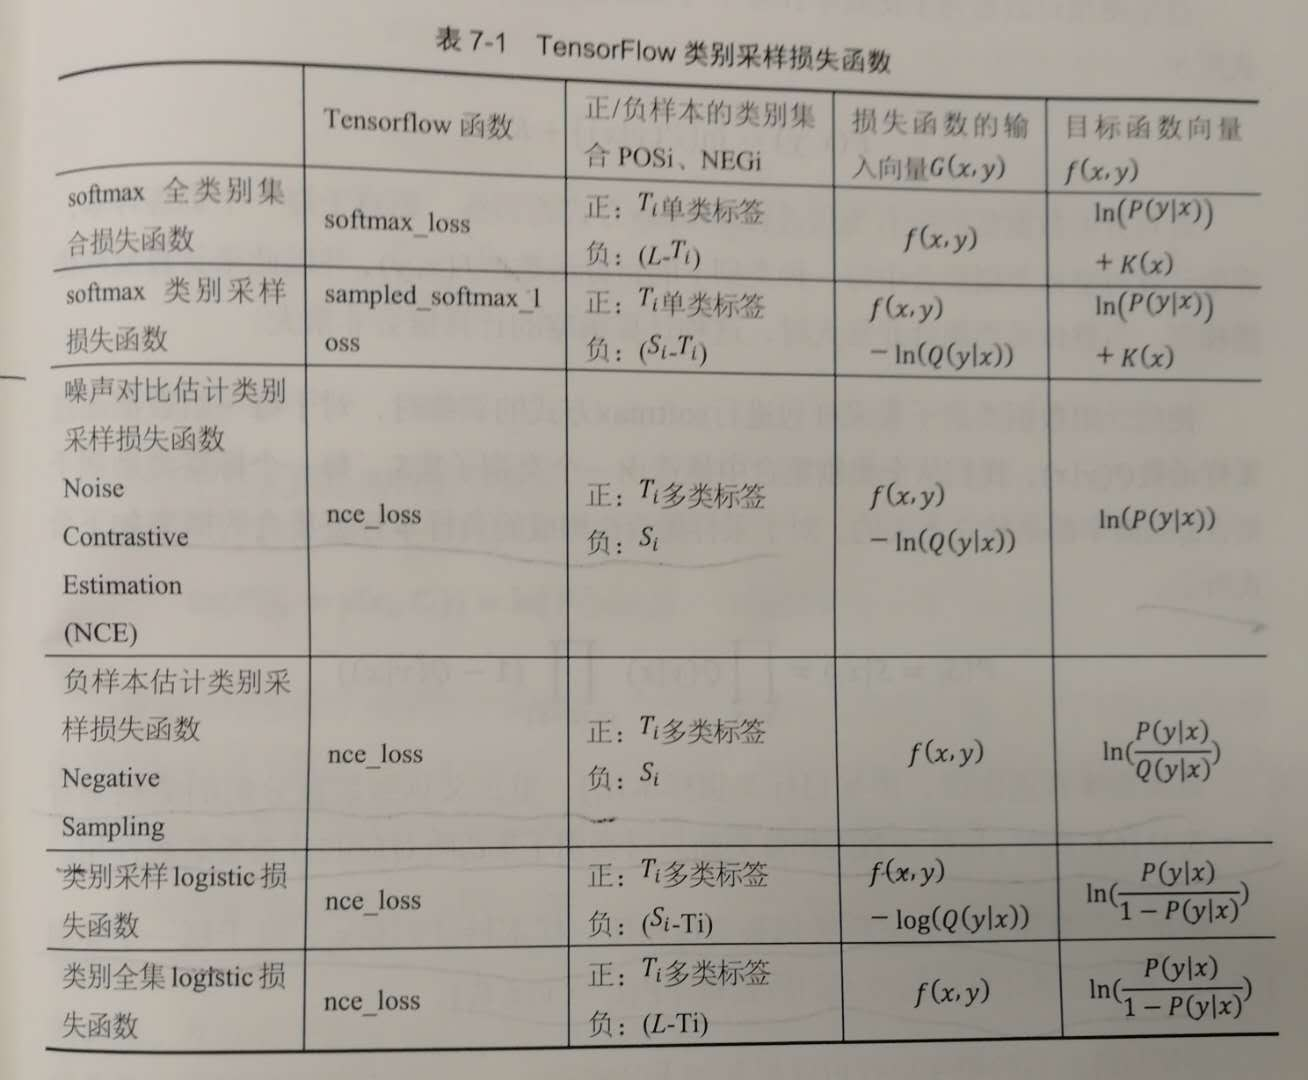

## 目标函数优化策略
### 随机梯度下降SGD
令训练样本集合构成的目标函数*f(x)*,其中*x*表示待求解的模型参数,模型参数*x*对应样本*i*的优化目标梯度向量为$f^{'i}(x)=f^i(x)-y^i$,令m表示单次训练分组batch数据包中的样本量,利用梯度函数的线性性质,可以近似得出模型参数x对应m个样本的梯度$\sum_{i=0}^m{f^{'m}(x)}=\sum_{i=0}^m{(f^i(x)-y^i)}$,显然当batch大小与数据集样本数量相同时,计算的梯度为训练集全局最优梯度,此时更新参数$x=x-r\sum_{i=0}^m{f^{'m}(x)}$往往能得到较理想的效果.<br/>
然而,对于较大的数据,训练过程需要反复技术训练集产生的加权梯度,将导致较长的训练耗时.对于训练样本数据庞大的情况,可以假设对样本集分块后计算的梯度存在高度的相似性,因此可以通过样本集的部分数据计算梯度来近似表示全局最优梯度,使用单个样本计算梯度的极端例子被称为在线学习.与之相比,使用batch数据包方式一般能取得更好的效果,但在使用batch数据包训练时,__训练样本输入的先后顺序非常重要__,如果样本不均衡,比如正样本是负样本的1/100,__当数据包中连续出现同种类别的样本时,将很可能导致过拟合,部分类别样本的权重将被吞噬,而对样本进行随机排序,能够在一定程度上较好地解决样本类别的非均衡问题,此即SGD__.
SGD有两个问题:一,网络层模型参数使用相同的学习率进行梯度更新;二,学习率参数完全由人工经验输入.
### RMSProp
随机梯度下降无法对不同模型权重设置不同的学习步长,有时候函数优化策略需要根据各梯度分量的实际分布情况,自适应地调整学习步长,在自变量区间内梯度较小且保持一致的情况下应采取较大的学习步长,在自变量区间内梯度较大且方向不定的情况下应采取较小的步长.<br/>RMSProp算法是一种自适应学习率的优化算法,通过统计近似梯度均值的方式来调整学习率,当权重梯度均值较大时等比缩小学习率,当权重梯度均值较小时等比放大学习率.在现实中,RMSProp有两个版本,一个版本是使用衰变因子直接估算梯度均值绝对值,当梯度均值较大时学习率等比下降,反之上升.另一个版本是维护梯度的平均值,并以此预估梯度方差,然后再对学习率进行自适应调整.
### Adam
无论是SGD还是RMSProp,学习率都是需要人工设置的超参数.尽管RMSProp在内部实现了对不同模型权重学习率的自适应调整,其初始数值仍然是需要人为设置,并且学习的内部调整策略与训练迭代次数无关.按照一般实验观察结果,随着迭代次数的增加,准确率越来越高,应该缩小更新步长,否则可能会造成在极小值附近的来回震荡.若希望随着迭代次数的增加等比减少学习率基数,可以根据如下公式进行动态调整.
$$learning_rate_t=learning_rate_0\times \alpha^{max(0,\frac{item_num}{learning_rate_step}-offset)}$$
Adam算法使用迭代次数作为参数对梯度均值和梯度均值方差进行了矫正,算法如下:
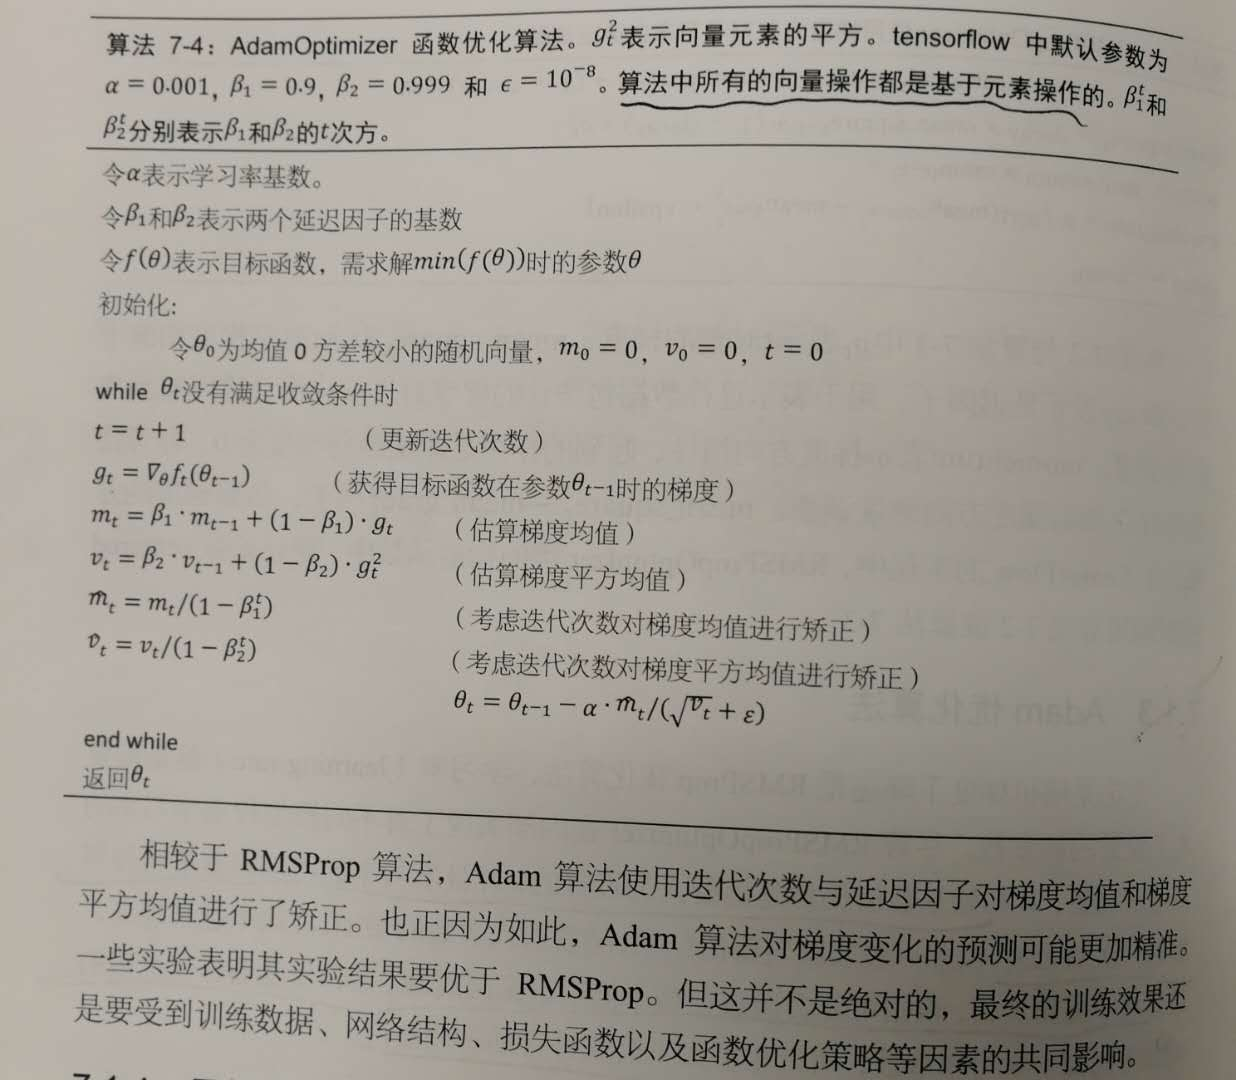